https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
# import librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns' , None)

In [2]:
# import dataset
train_df = pd.read_excel('Data/Data_Train.xlsx')
test_df = pd.read_excel('Data/Test_set.xlsx')
print(train_df.shape)
print(test_df.shape)

(10683, 11)
(2671, 10)


In [3]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
# merge train and test dataset
big_df = train_df.append(test_df , sort = False)

In [6]:
big_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [7]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


## Feature Engineering

In [8]:
big_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

here as we can see all the columns are as object so after converting these columns as integer we need to convert this data type as int.

In [10]:
## convert date of journey into seprate Date , Month and year

big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0].astype(int)
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1].astype(int)
big_df['year'] = big_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [11]:
# Drop the date of journey column
big_df.drop(columns = 'Date_of_Journey' , inplace= True)

In [12]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
# create Arrival time in proper format
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]
big_df['Arrival_hour'] = big_df['Arrival_Time'].str.split(':').str[0].astype('int')
big_df['Arrival_minute'] = big_df['Arrival_Time'].str.split(':').str[1].astype('int')

In [14]:
# drop arrival time column
big_df.drop(columns='Arrival_Time' , inplace =True)

In [15]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [16]:
# separate the Departure time into hour and minute.
big_df['Dep_hour'] = big_df['Dep_Time'].str.split(':').str[0].astype('int')
big_df['Dep_minute'] = big_df['Dep_Time'].str.split(':').str[1].astype('int')

In [17]:
# drop the Dep_Time Column
big_df.drop(columns='Dep_Time' , inplace = True)

In [18]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [19]:
# work on total_stop

big_df[big_df['Total_Stops'].isnull()]


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [20]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [21]:
# replace non_stop with 0 stop
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop' , '0 stop')

In [22]:
# only keep numerical value and rempve the stop from the columns
big_df['stop'] = big_df['Total_Stops'].str.split(' ').str[0].astype('int')

#drop the total stop column
big_df = big_df.drop(['Total_Stops'] , axis = 1)

In [23]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,1,10,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,13,15,5,50,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,4,25,9,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,21,35,16,50,1


In [24]:
#big_df[big_df['Route'].isnull()]

In [25]:
big_df['Route'].count()

13353

In [26]:
big_df['Route1'] = big_df['Route'].str.split('→').str[0]
big_df['Route2'] = big_df['Route'].str.split('→').str[1]
big_df['Route3'] = big_df['Route'].str.split('→').str[2]
big_df['Route4'] = big_df['Route'].str.split('→').str[3]
big_df['Route5'] = big_df['Route'].str.split('→').str[4]
big_df['Route6'] = big_df['Route'].str.split('→').str[5]

In [27]:
big_df['Route1'] = big_df['Route1'].fillna('None')
big_df['Route2'] = big_df['Route2'].fillna('None')
big_df['Route3'] = big_df['Route3'].fillna('None')
big_df['Route4'] = big_df['Route4'].fillna('None')
big_df['Route5'] = big_df['Route5'].fillna('None')
big_df['Route6'] = big_df['Route6'].fillna('None')

In [28]:
big_df.drop(columns='Route' , inplace=True)
big_df.drop(columns='Duration' , inplace=True)

In [29]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,stop,Route1,Route2,Route3,Route4,Route5,Route6
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,1,10,22,20,0,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,13,15,5,50,2,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,4,25,9,25,2,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,23,30,18,5,1,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,21,35,16,50,1,BLR,NAG,DEL,None,None,None


In [30]:
big_df.isnull().sum()

Airline               0
Source                0
Destination           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
stop                  0
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
Route6                0
dtype: int64

In [31]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
year                 int32
Arrival_hour         int32
Arrival_minute       int32
Dep_hour             int32
Dep_minute           int32
stop                 int32
Route1              object
Route2              object
Route3              object
Route4              object
Route5              object
Route6              object
dtype: object

## EDA

In [32]:
# lets look at the distribution of price
big_df.corr()

,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,stop
Price,1.000000,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.006819,-0.024492,0.603883
Date,-0.153738,1.000000,-0.035495,NaN,0.000982,-0.014631,-0.002970,-0.008988,-0.011081
Month,-0.103651,-0.035495,1.000000,NaN,-0.003226,-0.110276,0.034494,-0.069407,0.046920
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_hour,0.024264,0.000982,-0.003226,NaN,1.000000,-0.150636,0.004296,0.043967,0.037154
Arrival_minute,-0.086155,-0.014631,-0.110276,NaN,-0.150636,1.000000,0.067645,-0.018133,-0.108233
Dep_hour,0.006819,-0.002970,0.034494,NaN,0.004296,0.067645,1.000000,-0.026674,-0.070709
Dep_minute,-0.024492,-0.008988,-0.069407,NaN,0.043967,-0.018133,-0.026674,1.000000,-0.000116
stop,0.603883,-0.011081,0.046920,NaN,0.037154,-0.108233,-0.070709,-0.000116,1.000000


In [33]:
x = big_df['Price'][:10683]


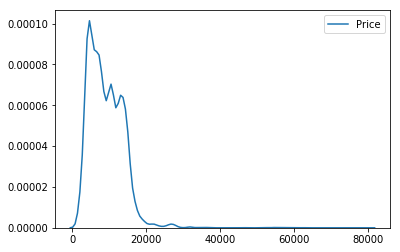

In [34]:
sns.kdeplot(data = x)

so as this is a dependent feature we have cannot use log normal distribution to tranform our value. so we have to replace the nan value with mean or median.

In [35]:
big_df['Price'].fillna(big_df['Price'].mean() , inplace = True)

In [36]:
big_df.tail()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,stop,Route1,Route2,Route3,Route4,Route5,Route6
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,20,25,20,30,1,CCU,DEL,BLR,None,None,None
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,16,55,14,20,0,CCU,BLR,None,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,4,25,21,50,1,DEL,BOM,COK,None,None,None
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,19,15,4,0,1,DEL,BOM,COK,None,None,None
2670,Multiple carriers,Delhi,Cochin,No info,9087.064121,15,6,2019,19,15,4,55,1,DEL,BOM,COK,None,None,None


In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
big_df['Airline'] = encoder.fit_transform(big_df['Airline'])
big_df['Source'] = encoder.fit_transform(big_df['Source'])
big_df['Destination'] = encoder.fit_transform(big_df['Destination'])
big_df['Additional_Info'] = encoder.fit_transform(big_df['Additional_Info'])
big_df['Route1'] = encoder.fit_transform(big_df['Route1'])
big_df['Route2'] = encoder.fit_transform(big_df['Route2'])
big_df['Route3'] = encoder.fit_transform(big_df['Route3'])
big_df['Route4'] = encoder.fit_transform(big_df['Route4'])
big_df['Route5'] = encoder.fit_transform(big_df['Route5'])
big_df['Route6'] = encoder.fit_transform(big_df['Route6'])

In [38]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,stop,Route1,Route2,Route3,Route4,Route5,Route6
0,3,0,5,8,3897.0,24,3,2019,1,10,22,20,0,0,13,30,13,5,1
1,1,3,0,8,7662.0,1,5,2019,13,15,5,50,2,2,25,1,3,5,1
2,4,2,1,8,13882.0,9,6,2019,4,25,9,25,2,3,32,4,5,5,1
3,3,3,0,8,6218.0,12,5,2019,23,30,18,5,1,2,34,3,13,5,1
4,3,0,5,8,13302.0,1,3,2019,21,35,16,50,1,0,34,8,13,5,1


## Feature Selection

In [39]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [40]:
df_train = big_df[0:10683]
df_test = big_df[10683:]

In [41]:
X = df_train.drop(columns='Price')
y = df_train['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0)

In [ ]:
model = SelectFromModel(Lasso(alpha = 0.005 , random_state = 0))

In [ ]:
model.fit(X_train , y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [ ]:
X_train.columns[(model.get_support())]

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Arrival_hour', 'Arrival_minute', 'Dep_hour', 'Dep_minute', 'stop',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
# drop column which are not important
X_train.drop(columns=['year' , 'Route6'] , inplace =True)
X_test.drop(columns=['year' , 'Route6'] , inplace =True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   2.5s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   7.1s
[CV] n_estimators=1200, min_samples_split=100, min_s